In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import vapeplot
import numpy as np

from selection_methods import SelectionMethod

In [3]:
vapeplot.set_palette('cool')
plt.rc('axes', grid=False, facecolor="white")
plt.rcParams.update({'font.size': 18})

In [4]:
path_data = "../../results_explored_by_task/antifungal/"
list_documents = os.listdir(path_data)
len(list_documents)

24

In [5]:
list_df = []

for encoder in list_documents:
    list_explored = os.listdir(f"{path_data}{encoder}")
    for element in list_explored:

        df_data = pd.read_csv(f"{path_data}{encoder}/{element}")
        df_data['encoder'] = encoder
        list_df.append(df_data)
df_results = pd.concat(list_df, axis=0)
df_results

,description,validation_accuracy,validation_f1_score,validation_precision,validation_recall,validation_mcc,fit_time,score_time,train_f1_weighted,train_recall_weighted,train_precision_weighted,train_accuracy,iteration,encoder
0,KNeighbors,0.582310,0.498647,0.659516,0.582310,0.195658,0.002228,0.016064,0.458867,0.552788,0.648252,0.552788,1902,Group_4
1,DecisionTree,0.697789,0.697514,0.697449,0.697789,0.392487,0.017780,0.004424,0.705422,0.705731,0.706339,0.705731,1902,Group_4
2,Bagging,0.759214,0.757889,0.760291,0.759214,0.516205,0.106291,0.005698,0.782198,0.782735,0.784635,0.782735,1902,Group_4
3,RandomForest,0.813268,0.813381,0.817427,0.813268,0.630417,0.197793,0.012887,0.793340,0.794330,0.800546,0.794330,1902,Group_4
4,ExtraTrees,0.815725,0.815776,0.821051,0.815725,0.636668,0.156594,0.014355,0.783742,0.784806,0.791135,0.784806,1902,Group_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,GradientBoosting,0.905697,0.905373,0.909127,0.905697,0.814468,24.756956,0.009938,0.891827,0.891983,0.894945,0.891983,8627,prottrans_uniref
7,Hist Gradient Boosting,0.909627,0.909224,0.914419,0.909627,0.823660,10.137138,0.013570,0.893502,0.893671,0.897265,0.893671,8627,prottrans_uniref
8,SVC,0.520629,0.479636,0.541715,0.520629,0.067415,0.196066,0.128965,0.471524,0.486920,0.483564,0.486920,8627,prottrans_uniref
9,Gaussian Process,0.618861,0.618363,0.621109,0.618861,0.240463,0.781320,0.136477,0.600244,0.601688,0.602618,0.601688,8627,prottrans_uniref


In [6]:
df_results["overffiting_accuracy"] = df_results["validation_accuracy"]/df_results["train_accuracy"]
df_results["overffiting_f1"] = df_results["validation_f1_score"]/df_results["train_f1_weighted"]
df_results["overffiting_precision"] = df_results["validation_precision"]/df_results["train_precision_weighted"]
df_results["overffiting_recall"] = df_results["validation_recall"]/df_results["train_recall_weighted"]
df_results

,description,validation_accuracy,validation_f1_score,validation_precision,validation_recall,validation_mcc,fit_time,score_time,train_f1_weighted,train_recall_weighted,train_precision_weighted,train_accuracy,iteration,encoder,overffiting_accuracy,overffiting_f1,overffiting_precision,overffiting_recall
0,KNeighbors,0.582310,0.498647,0.659516,0.582310,0.195658,0.002228,0.016064,0.458867,0.552788,0.648252,0.552788,1902,Group_4,1.053406,1.086692,1.017377,1.053406
1,DecisionTree,0.697789,0.697514,0.697449,0.697789,0.392487,0.017780,0.004424,0.705422,0.705731,0.706339,0.705731,1902,Group_4,0.988746,0.988789,0.987415,0.988746
2,Bagging,0.759214,0.757889,0.760291,0.759214,0.516205,0.106291,0.005698,0.782198,0.782735,0.784635,0.782735,1902,Group_4,0.969950,0.968923,0.968975,0.969950
3,RandomForest,0.813268,0.813381,0.817427,0.813268,0.630417,0.197793,0.012887,0.793340,0.794330,0.800546,0.794330,1902,Group_4,1.023841,1.025261,1.021086,1.023841
4,ExtraTrees,0.815725,0.815776,0.821051,0.815725,0.636668,0.156594,0.014355,0.783742,0.784806,0.791135,0.784806,1902,Group_4,1.039396,1.040874,1.037814,1.039396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,GradientBoosting,0.905697,0.905373,0.909127,0.905697,0.814468,24.756956,0.009938,0.891827,0.891983,0.894945,0.891983,8627,prottrans_uniref,1.015375,1.015188,1.015848,1.015375
7,Hist Gradient Boosting,0.909627,0.909224,0.914419,0.909627,0.823660,10.137138,0.013570,0.893502,0.893671,0.897265,0.893671,8627,prottrans_uniref,1.017854,1.017596,1.019119,1.017854
8,SVC,0.520629,0.479636,0.541715,0.520629,0.067415,0.196066,0.128965,0.471524,0.486920,0.483564,0.486920,8627,prottrans_uniref,1.069229,1.017204,1.120254,1.069229
9,Gaussian Process,0.618861,0.618363,0.621109,0.618861,0.240463,0.781320,0.136477,0.600244,0.601688,0.602618,0.601688,8627,prottrans_uniref,1.028541,1.030186,1.030684,1.028541


In [7]:
df_results_train = df_results[['description', 'train_f1_weighted',
            'train_recall_weighted', 'train_precision_weighted', 'train_accuracy',
            'iteration', 'encoder']]

df_results_train.columns = ["Algorithm", "F1", "Recall", "Precision", "Accuracy", "Iteration", "Encoder"]
df_results_train['Stage'] = "Training"

df_results_validation = df_results[['description', 'validation_accuracy', 'validation_f1_score', 'validation_precision',
    'validation_recall', 'validation_mcc', 'iteration', 'encoder']]

df_results_validation.columns = ["Algorithm", "Accuracy", "F1", "Precision", "Recall", "MCC", "Iteration", "Encoder"]
df_results_validation['Stage'] = "Validating"

df_concat = pd.concat([df_results_train, df_results_validation], axis=0)
df_concat["Task"] = "Antifungal"

df_concat.to_csv("../../results_explored_by_task/summary_models_explored/antifungal_explored.csv", index=False)

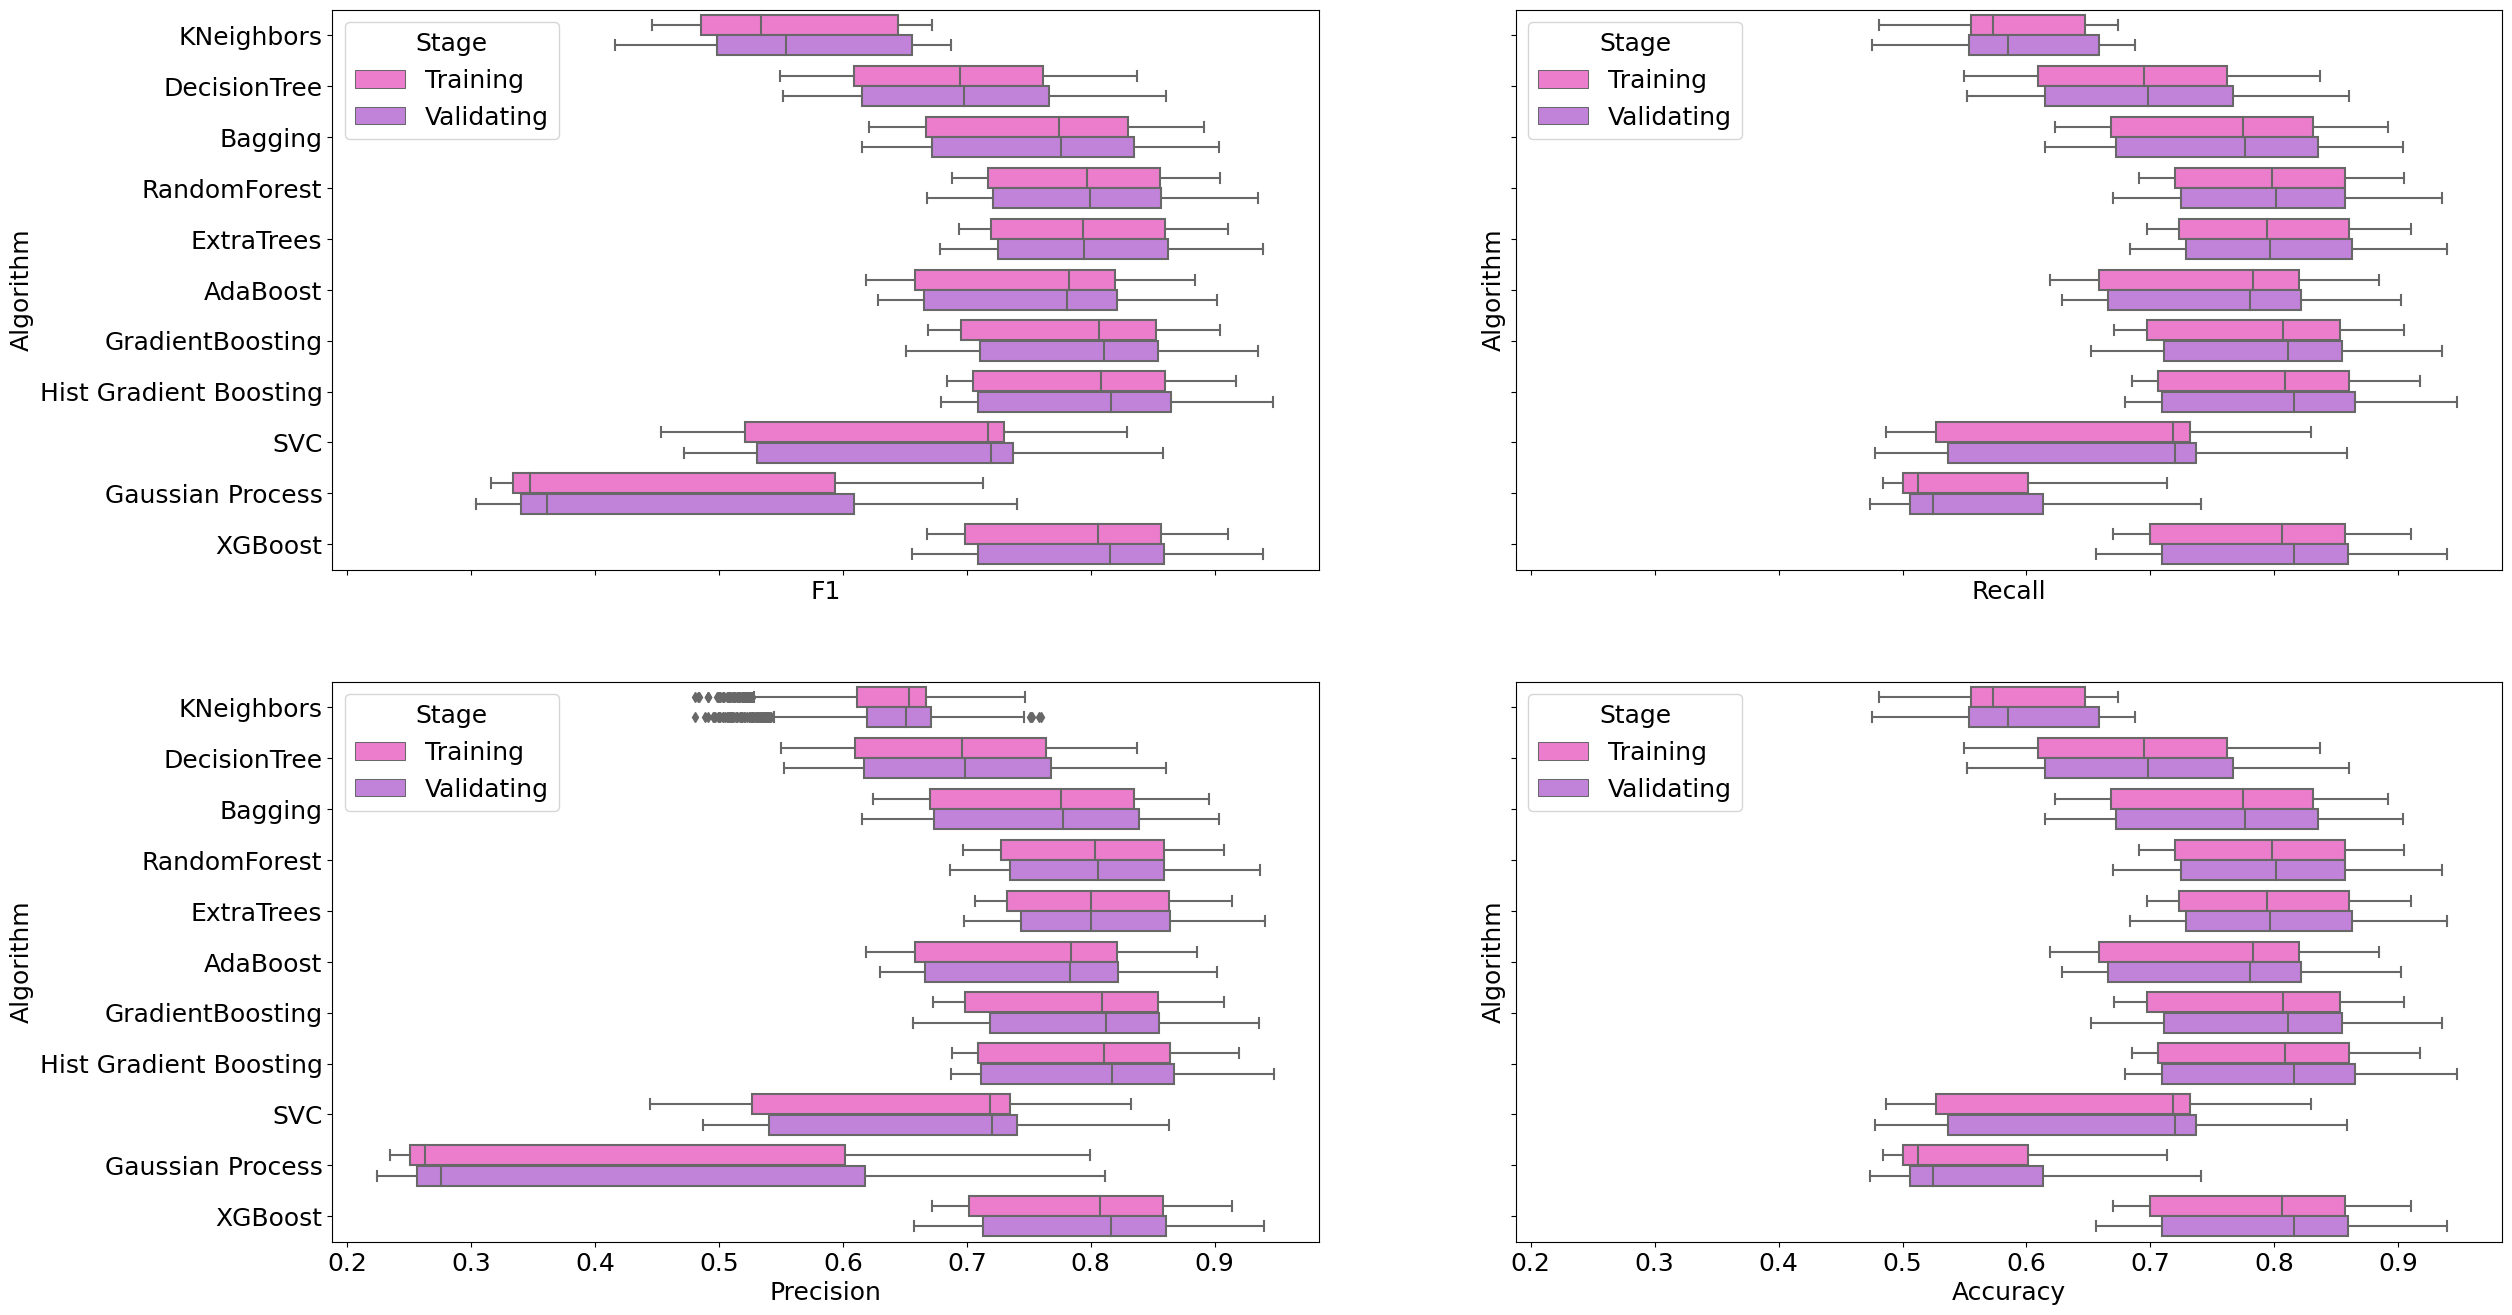

In [14]:
fig, axes = plt.subplots(2,2, figsize=(28,16), sharex=True, sharey=True)
ax1 = sns.boxplot(ax=axes[0][0], data=df_concat, x="F1", hue="Stage", y="Algorithm")
ax2 = sns.boxplot(ax=axes[0][1], data=df_concat, x="Recall", hue="Stage", y="Algorithm")
ax3 = sns.boxplot(ax=axes[1][0], data=df_concat, x="Precision", hue="Stage", y="Algorithm")
ax4 = sns.boxplot(ax=axes[1][1], data=df_concat, x="Accuracy", hue="Stage", y="Algorithm")

plt.savefig("../../results_explored_by_task/summary_models_explored/antifungal/algorithm_distribution.png")

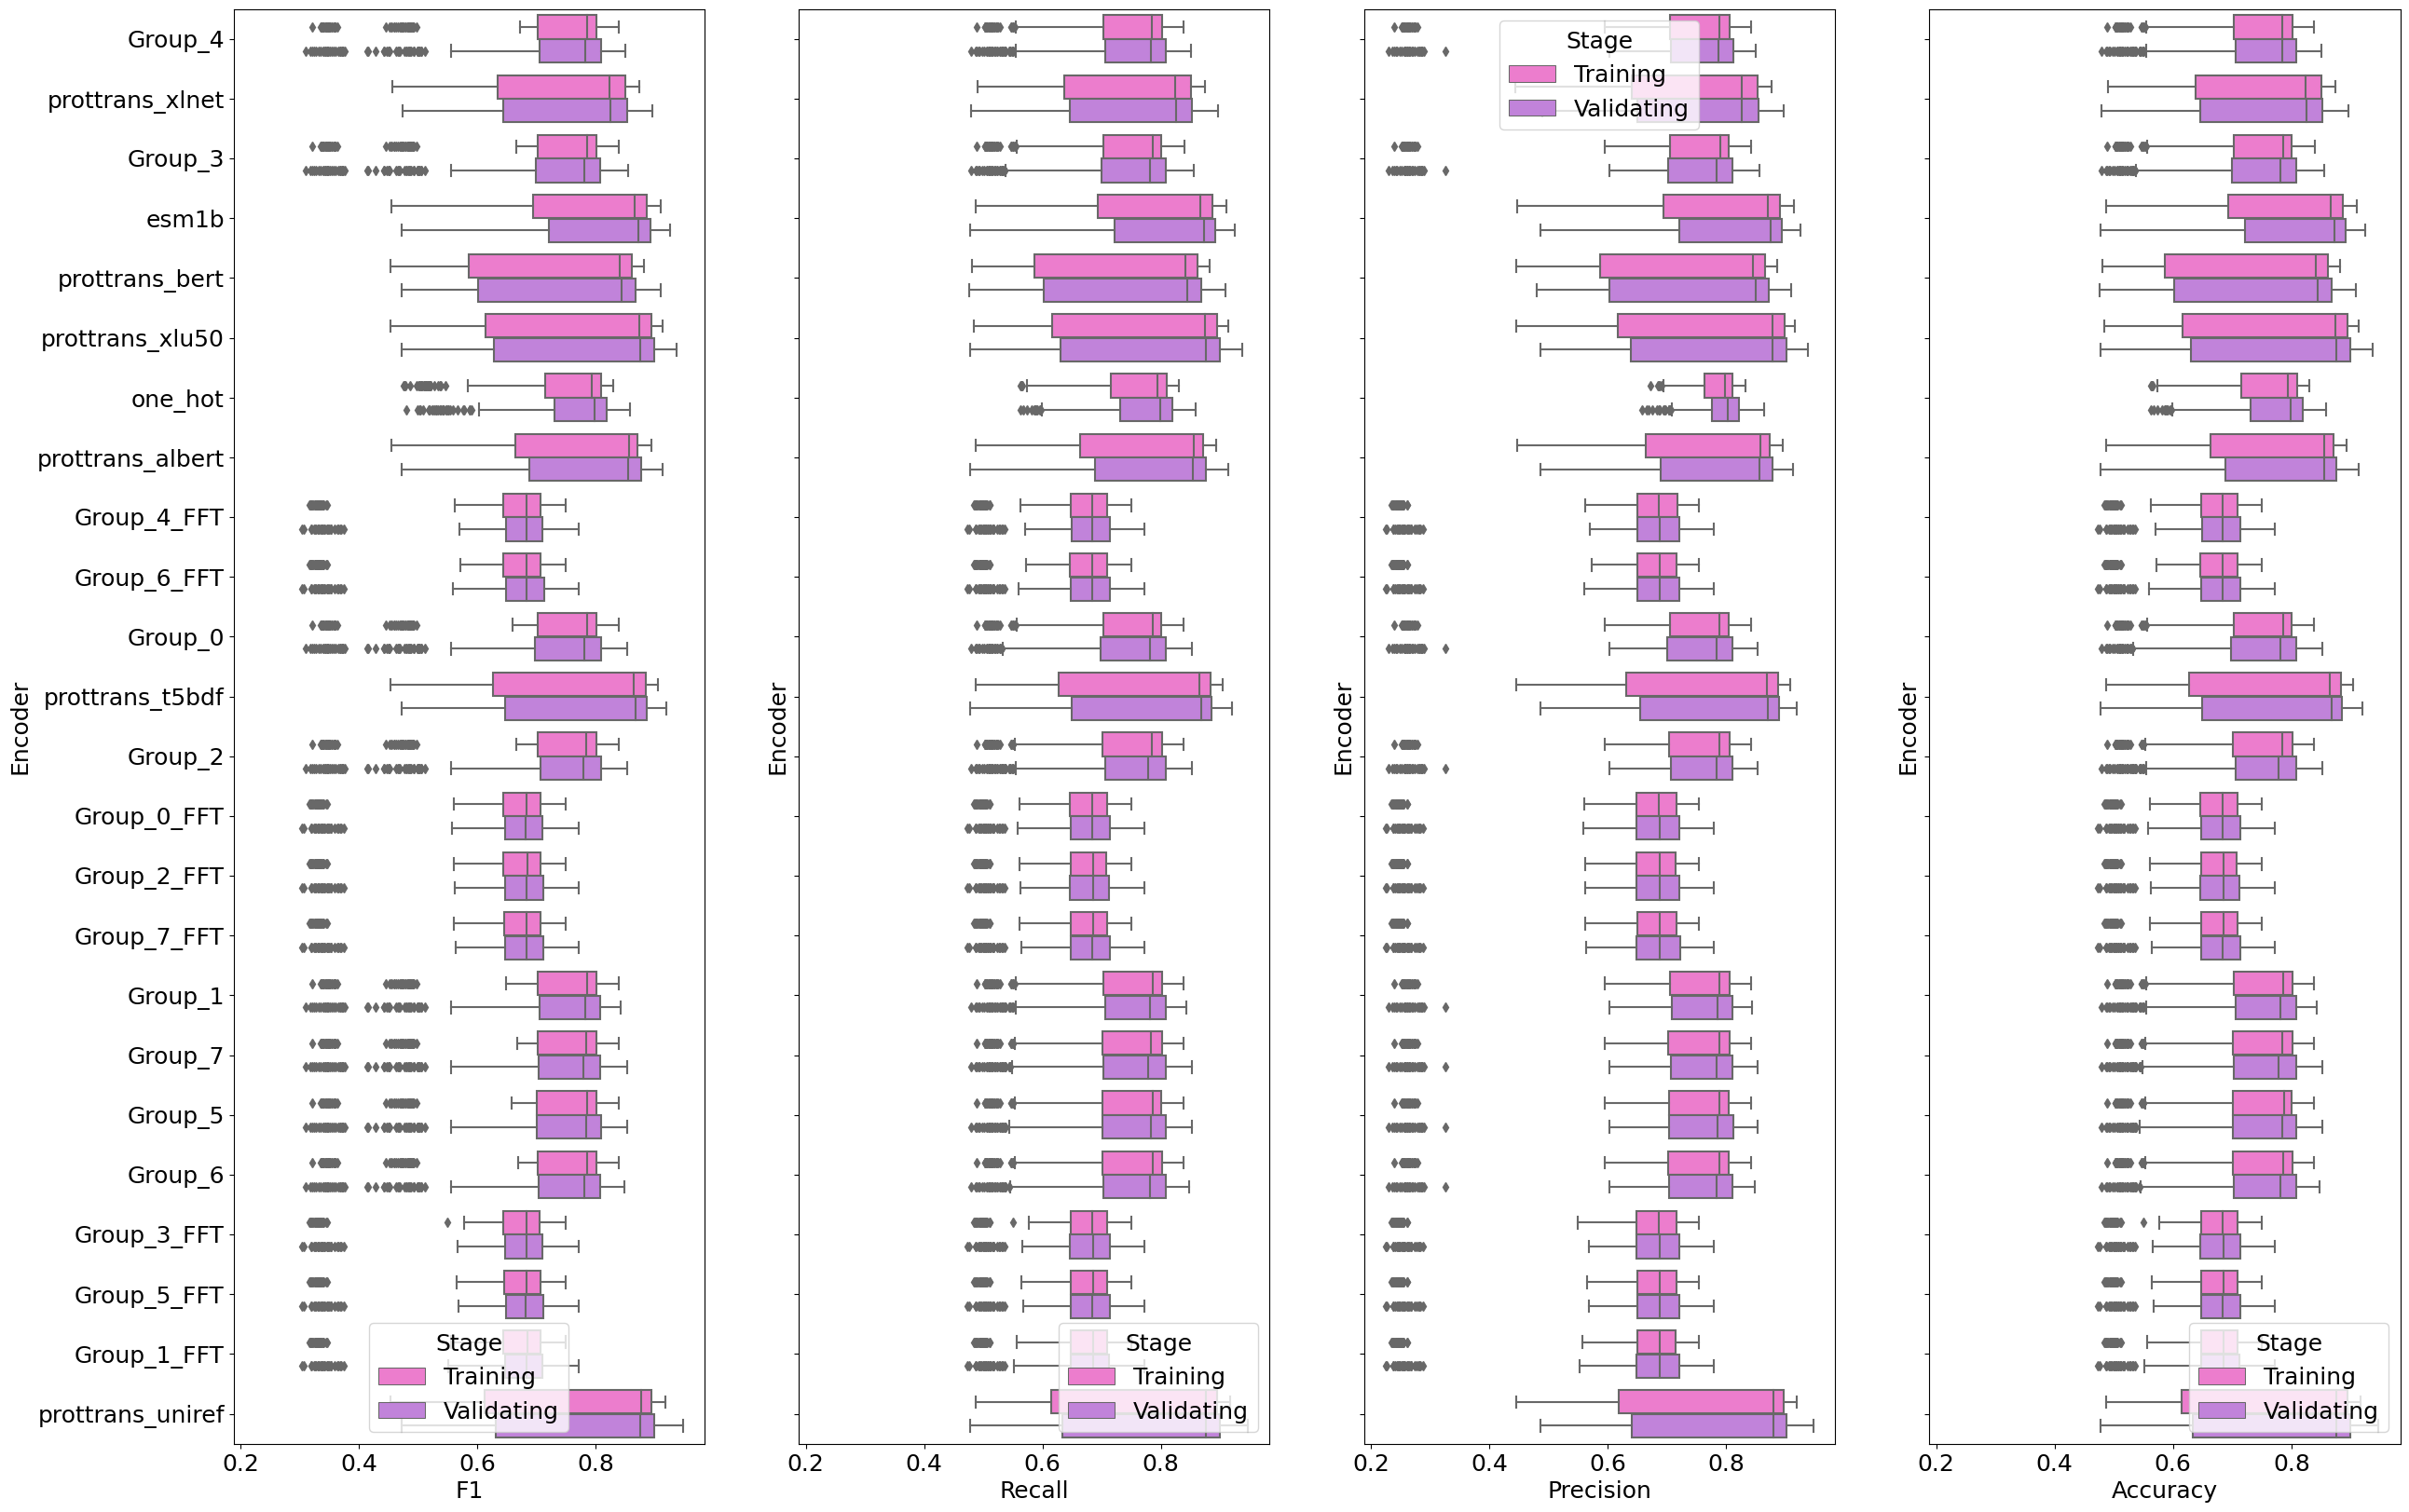

In [13]:
fig, axes = plt.subplots(1,4, figsize=(30,20), sharex=True, sharey=True)
ax1 = sns.boxplot(ax=axes[0], data=df_concat, x="F1", hue="Stage", y="Encoder")
ax2 = sns.boxplot(ax=axes[1], data=df_concat, x="Recall", hue="Stage", y="Encoder")
ax3 = sns.boxplot(ax=axes[2], data=df_concat, x="Precision", hue="Stage", y="Encoder")
ax4 = sns.boxplot(ax=axes[3], data=df_concat, x="Accuracy", hue="Stage", y="Encoder")

plt.savefig("../../results_explored_by_task/summary_models_explored/antifungal/encoder_distribution.png")

In [12]:
selection_instance = SelectionMethod()
df_selection = selection_instance.select(15, df_results_train, df_results_validation)
df_selection.to_csv("../../results_explored_by_task/summary_models_explored/antifungal/selected_combinations.csv", index=False)

df_selection

,Algorithm,Encoder,mean_accuracy_training_x,mean_f_score_training_x,mean_precision_training_x,mean_recall_training_x,mean_accuracy_testing_x,mean_f_score_testing_x,mean_precision_testing_x,mean_recall_testing_x,mean_accuracy_testing_y,mean_f_score_testing_y,mean_precision_testing_y,mean_recall_testing_y,mean_accuracy_training_y,mean_f_score_training_y,mean_precision_training_y,mean_recall_training_y,Voting
92,ExtraTrees,prottrans_t5bdf,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
208,RandomForest,esm1b,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
212,RandomForest,prottrans_t5bdf,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
213,RandomForest,prottrans_uniref,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
256,XGBoost,esm1b,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16


In [11]:
df_results_validation[(df_results_validation["Algorithm"] == "ExtraTrees") & (df_results_validation["Encoder"] == "prottrans_t5bdf")].describe()

,Accuracy,F1,Precision,Recall,MCC,Iteration
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.891225,0.890980,0.893967,0.891225,0.784851,4850.066667
std,0.011215,0.011272,0.010587,0.011215,0.021727,2834.061043
min,0.874263,0.874065,0.877777,0.874263,0.752149,12.000000
25%,0.884086,0.883711,0.886828,0.884086,0.769871,2682.250000
50%,0.888016,0.887914,0.891420,0.888016,0.779618,4948.000000
75%,0.897348,0.896924,0.900825,0.897348,0.797519,7178.750000
max,0.919450,0.919441,0.919438,0.919450,0.838345,9537.000000
